# Autograd: your professional grade automatic differentiator

Chapter 4 of this text describes in significant detail how you can build your own Automatic Differentiator calculator.  However in the interest of making this text as modular as possible, outside of Chapter 4 we will be using the professional grade Automatic Differentiation calculator [autorad](https://github.com/HIPS/autograd).  This is a free professioally built and maintained derivative calculator that works with a large swath of the ``numpy`` based library, i.e., it allows you to automatically compute the derivative of functions built with the ``numpy`` library.  It has a very nice user-interface and pairs extremely well with standard ``numpy`` commands, and is easy to pick up and use (due of course to the extensive work that has been put into making it!).

You can install this package by clicking the link above and following the install instructions or via your terminal by typing 

``pip install autograd``

It is also highly recommended that you install the Anaconda ``Python`` 3 distribution - which you can [find here](https://www.anaconda.com/download/).  This ``Python`` basic distribution includes a number of useful libraries - including numpy, matplotlib, and Jupyter itself - and makes it easier to install additional libraries as well. 

In this short Section we show off a few examples highlighting the basic usage of the autograd calculator, along with the syntax for producing two-dimensional and three-dimensional plots using ``matplotlib``.

In [1]:
# # this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
# %matplotlib notebook
# from matplotlib import rcParams
# rcParams['figure.autolayout'] = True

#### <span style="color:#a50e3e;">Example 1. </span> Computing derivatives of single-input functions using ``autograd``

Since ``autograd`` is specially designed to automatically compute the derivative(s) of ``numpy`` code, it comes with its own distribution of ``numpy`` that wrappers and slightly  modified versions of certain functionalities.  You can use ``autograd``'s version of ``numpy`` exactly like you would the standard version - nothing about the user interface has been changed.  To import this ``autograd`` wrapped version of ``numpy`` use the line below.

In [2]:
# import statement for autograd wrapped numpy
import autograd.numpy as np   

Now, lets compute a few derivatives.  There are two common ways of defining functions in ``Python``.  First the the standard ``def`` named ``Python`` function declaration like below

In [3]:
# a named Python function
def my_func(w):
    return np.tanh(w)

WIth this declaration ``Python`` now understands ``my_func`` as its own function, so it can be called as follows.

In [4]:
# how to use the 'sin' function
w_val = 1.0   # a test input for our 'sin' function
g_val = my_func(w_val)
print (g_val)

0.761594155956


You can also create "anonymous" functions in ``Python`` -  functions you can define in a single line of code - by using the ``lambda`` command.  We can produce the same function using lambda as shown below.

In [5]:
# how to use 'lambda' to create an "anonymous" function - just a pithier way of writing functions in Python
g = lambda w: np.tanh(w)

We can then use it with a test value as shown below.

In [6]:
# how to use the 'sin' function
w_val = 1.0   
g_val = g(w_val)
print (g_val)

0.761594155956


And - of course - regardless of how we define our function in ``Python`` it still amounts to the same thing mathematically/computationally.

Notice on subtlety here (regardless of which kind of ``Python`` function we use): the data-type returned by our function matches the type we input.  Above we input a ``float`` value to our function, and what is returned is also a ``float``.  If we input the same value as a ``numpy`` array then numerically our function of course computes the same evaluation, but evaluation is returned as a ``numpy`` array as well.  We illustrate this below.

In [7]:
# if we input a float value into our function, it returns a float
print (type(w_val))
print (type(g_val))

# if we input a numpy array, it returns a numpy array
w_val = np.array([1.0])  
g_val = g(w_val)
print (g_val)
print (type(w_val))
print (type(g_val))

<class 'float'>
<class 'numpy.float64'>
[ 0.76159416]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


This factoid has no immediate consequences, but it is worth taking note of to avoid confusion (when e.g., comparing the output when evaluating at single points - which are naturally dealt with by inputing a ``float`` - versus multiple points, which is more naturally dealt with by inputing a ``numpy`` array).  Much later - when we are constructing considerably complex functions we need to differentiate - this will be something to keep in mind for de-bugging purposes.

In any case - we can visualize either version of our function by using ``matplotlib`` assets, as shown below.  First we load in the library into our current namespace.

In [8]:
# the import statement for matplotlib
import matplotlib.pyplot as plt

Now we plot the function - here we will plot the ``lambda`` version - over a fine range of points on the interval $[-5,5]$.

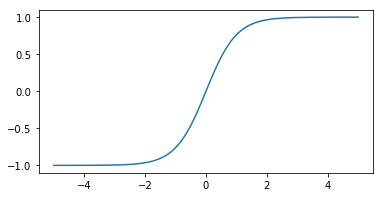

In [9]:
# create a sample of points to plot over 
w_vals = np.linspace(-5,5,200)

# evaluate the function over each of these values - one can use an explicit for-loop here instead of a list comprehension
g_vals = [g(v) for v in w_vals]

# plot
fig, ax = plt.subplots(1, 1, figsize=(6,3))
ax.plot(w_vals,g_vals)
plt.show()

Now, using ``autograd`` we can then compute the derivative of our function here automatically.  Below we show the proper import statement and manner of using the gradient calculator called ``grad``.

In [10]:
# import statment for gradient calculator
from autograd import grad    

To use ``grad`` we simply pass in the function we wish to differentiate.  ``grad`` works by *explicitly* computing the computation graph of our input, giving us a ``Python`` function for its derivative that we can then evaluate wherever we want.  Here we call the derivative function of our input ``dgdw``.

In [11]:
# create the derivative/gradient function of g --> called dgdw
dgdw = grad(g)

The gradient function can be evaluated like our original ``Python`` function - as shown below.  

In [12]:
# evaluate the gradient function at a point
w_val = 1.0
print (dgdw(1.0))

0.419974341614


Just as with our original ``Python`` function we can then evaluate our gradient ``dgdw`` over a fine range of input and plot the result.  We do this below, plotting the original function as well for comparison.  

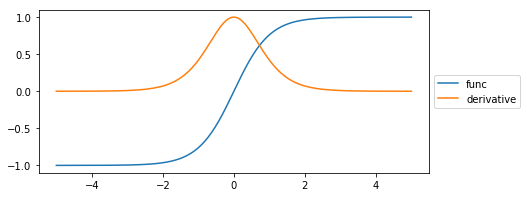

In [13]:
# create space over which to evaluate function and gradient
w_vals = np.linspace(-5,5,200)

# evaluate gradient over input range
g_vals = [g(v) for v in w_vals]
dg_vals = [dgdw(v) for v in w_vals]

# create figure
fig = plt.figure(figsize = (7,3))

# plot function and gradient values
plt.plot(w_vals,g_vals)
plt.plot(w_vals,dg_vals)
plt.legend(['func','derivative'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

We can compute higher order derivatives of our input function by using the same ``autograd``  functionality recursively, i.e., by plugging in the derivative ```dgdw``` into ``autograd``'s ``grad`` function.  Doing this once gives us the second derivative as shown below.

In [14]:
# compute the second derivative of our input function
dgdw2 = grad(dgdw)

We can then plot the input function, as well as the first and second derivatives, as shown below.

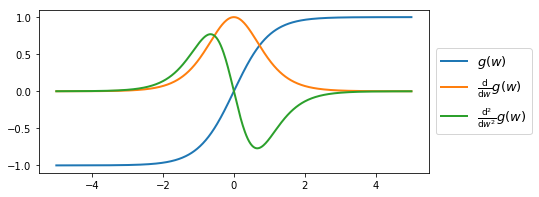

In [15]:
# define set of points over which to plot function and first two derivatives
w = np.linspace(-5,5,500)

# evaluate the input function g, first derivative dgdw, and second derivative dgdw2 over the input points
g_vals = [g(v) for v in w]
dg_vals = [dgdw(v) for v in w]
dg2_vals = [dgdw2(v) for v in w]

# plot the function and derivative
fig = plt.figure(figsize = (7,3))
plt.plot(w,g_vals,linewidth=2)
plt.plot(w,dg_vals,linewidth=2)
plt.plot(w,dg2_vals,linewidth=2)
plt.legend(['$g(w)$',r'$\frac{\mathrm{d}}{\mathrm{d}w}g(w)$',r'$\frac{\mathrm{d}^2}{\mathrm{d}w^2}g(w)$'],loc='center left', bbox_to_anchor=(1, 0.5),fontsize = 13)
plt.show()

#### <span style="color:#a50e3e;">Example 2. </span> Remember, whenever you use an Automatic Differentiatior to evaluate a gradient you are explicitly evaluating the function as well

Above you may notice that the derivative function ``dgdw`` we have constructed returns only the derivative evaluation, and not the function evaluation itself (we have computed this separately when e.g., plotting a range of function / derivative values above).  However as we described in the previous Sections, an Automatic Differentiator will always need to compute the value of the function itself whenever we use it to compute a derivative / gradient evaluation.  *So - in other words - whenever we evaluate the gradient, we get the function evaluation for free*.  This is a very handy technical fact which will save us a ton of computation later on when we discuss e.g., supervised learning models.  

We can already see an example of the waste - e.g., in the previous example when we evaluated / plotted the function and its first derivative there was no need to actually evaluate the function explicitly since these computations are already performed when we evaluate the gradient.  However when we used ``autograd``'s ``grad`` functionality to compute the gradient of our function in the previous example, and then evaluated it at a single point, ``grad`` only returned a single value: the evaluation of the derivative.  No function evaluation was returned - so where is the mirror function evaluation?  Well the function evaluation is indeed being computed 'under the hood' of ``grad``, it is simply not being returned via this method.  This is a design choice made by the authors of ``autograd`` to keep the interface of ``grad`` - their introductary Automatic Differentiation method - easy to pick up and use for a wide audience.  Later when the need to re-compute function evaluations becomes quite costly we will use this ``autograd`` method exclusively (one can view the entire list of ``autograd`` [methods available here](https://github.com/HIPS/autograd/blob/master/autograd/differential_operators.py). 

Now there is another ``autograd`` method called ``value_and_grad`` that returns everything computed 'under the hood' -  both the derivative(s) and function evaluations.  Below we use this ``autograd`` functionality to re-produce the previous example first derivative calculations.

In [16]:
# how to use 'lambda' to create an "anonymous" function - just a pithier way of writing functions in Python
g = lambda w: np.tanh(w)

In [17]:
# import statment for gradient calculator - this method will return both
# derivative and function evaluations (the latter always being computed 'under
# the hood')
from autograd import value_and_grad    

In [18]:
# create the derivative/gradient function of g --> called dgdw
dgdw = value_and_grad(g)

We have our derivative function ``dgdw`` above computed now using ``value_and_grad``.  Below we plug in a single point into this derivative function, and what is returned is both the function (left value) and derivative (right value) evaluation.  This function evaluation comes 'for free' whenever we evaluate the derivative - we need not evaluate the function itself again.

In [19]:
# evaluate the gradient function at a point
w_val = 1.0
print (dgdw(1.0))

(0.76159415595576485, 0.41997434161402608)


Now we use this to plot both the function and derivative over the same range used in the previous example - again without re-computing the function evaluations.

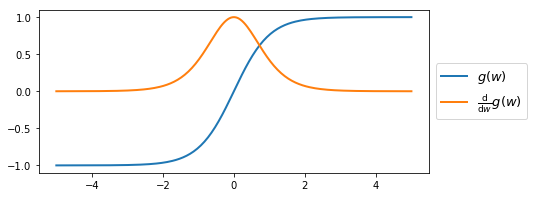

In [29]:
# create space over which to evaluate function and gradient
w_vals = np.linspace(-5,5,200)

# evaluate gradient over input range
g_vals = [dgdw(v)[0] for v in w_vals]
dg_vals = [dgdw(v)[1] for v in w_vals]

# create figure
fig = plt.figure(figsize = (7,3))

# plot the function and derivative
plt.plot(w_vals,g_vals,linewidth=2)
plt.plot(w_vals,dg_vals,linewidth=2)
plt.legend(['$g(w)$',r'$\frac{\mathrm{d}}{\mathrm{d}w}g(w)$',r'$\frac{\mathrm{d}^2}{\mathrm{d}w^2}g(w)$'],loc='center left', bbox_to_anchor=(1, 0.5),fontsize = 13)
plt.show()

#### <span style="color:#a50e3e;">Example 3. </span> Computing Taylor series approximations

Using ``autograd`` we can quickly illustrate Taylor series approximations of any single-input function.  Below we illustrate the ``tanh`` function, along with a first order Taylor series appromiation 

\begin{equation}
h(w) = g(w^0) + \frac{\mathrm{d}}{\mathrm{d}w}g(w^0)(w - w^0)
\end{equation}

centered at the point $w^0 = 1$.  Here the approximation is shown in green, with the point of tangency with the function shown as a red point.

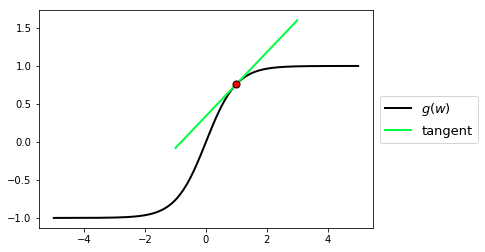

In [30]:
# create area over which to evaluate everything
w = np.linspace(-5,5,200); w_0 = 1.0; w_=np.linspace(-2+w_0,2+w_0,200);

# define and evaluate the function, define derivative
g = lambda w: np.tanh(w); dgdw = grad(g);
gvals = [g(v) for v in w]

# create tangent line at a point w_0
tangent = g(w_0) + dgdw(w_0)*(w_ - w_0)

# plot the function and derivative 
fig = plt.figure(figsize = (6,4))
plt.plot(w,gvals,c = 'k',linewidth=2,zorder = 1)
plt.plot(w_,tangent,c = [0,1,0.25],linewidth=2,zorder = 2)
plt.scatter(w_0,g(w_0),c = 'r',s=50,zorder = 3,edgecolor='k',linewidth=1)
plt.legend(['$g(w)$','tangent'],loc='center left', bbox_to_anchor=(1, 0.5),fontsize = 13)
plt.show()

Its just as easy to show the second order Taylor series approximation as well, whose formula is given as

\begin{equation}
h(w) = g(w^0) + \frac{\mathrm{d}}{\mathrm{d}w}g(w^0)(w - w^0) +  \frac{1}{2}\frac{\mathrm{d}^2}{\mathrm{d}w^2}g(w^0)(w - w^0)^2.
\end{equation}

Below we compute and plot both the ``tanh`` function, along with its first and second order Taylor series approximations at the point $w^0 = 1$.  The first and second order approximations are shown in green and blue respectively, with the point of expansion again shown as a red point.

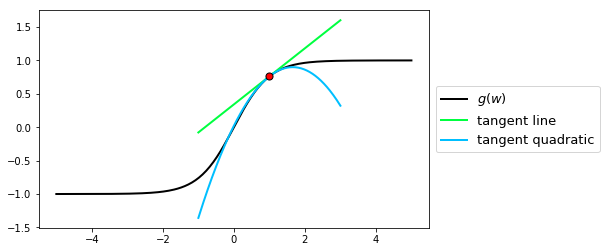

In [35]:
# create area over which to evaluate everything
w = np.linspace(-5,5,200); w_0 = 1.0; w_=np.linspace(-2+w_0,2+w_0,200);

# define and evaluate the function, define derivative
g = lambda w: np.tanh(w); dgdw = grad(g); dgdw2 = grad(dgdw);
gvals = [g(v) for v in w]

# create tangent line and quadratic
tangent = g(w_0) + dgdw(w_0)*(w_ - w_0)
quadratic = g(w_0) + dgdw(w_0)*(w_ - w_0) + 0.5*dgdw2(w_0)*(w_ - w_0)**2

# plot the function and derivative 
fig = plt.figure(figsize = (7,4))
plt.plot(w,gvals,c = 'k',linewidth=2,zorder = 1)
plt.plot(w_,tangent,c = [0,1,0.25],linewidth=2,zorder = 2)
plt.plot(w_,quadratic,c = [0,0.75,1],linewidth=2,zorder = 2)
plt.scatter(w_0,g(w_0),c = 'r',s=50,zorder = 3,edgecolor='k',linewidth=1)
plt.legend(['$g(w)$','tangent line','tangent quadratic'],loc='center left', bbox_to_anchor=(1, 0.5),fontsize = 13)
plt.show()

#### <span style="color:#a50e3e;">Example 4. </span> Computing derivatives of multi-input functions using ``autograd``

Here we use the same ``autograd`` functionality introduced in the previous example to compute the derivatives i.e., the gradient of a multi-input function.  Along the way we will see some of the process and syntax required to plot in three dimensions using the plotting library ``matplotlib``.

First lets define a ``Python`` version of the multi-input function 

\begin{equation}
g\left(\mathbf{w}\right) = \text{tanh}\left(w_1 - w_2\right).
\end{equation}

Here we will use the longer form ``def`` version of a ``Python`` function, but we could of course use the pithier ``lambda`` version if we like.

In [ ]:
def my_func(w):
    return np.tanh(w[0] - w[1])

Below we evaluate our function at a random point - note here the output is packaged in an array format since ``np.random.randn`` produces random points in this format.

In [ ]:
# evaluate our multi-input function at a random point
w_val = np.random.randn(2,1)
my_func(w_val)

To produce the a set of values over a range of input we can use the two-dimensional analog of ``linspace``, called ``meshgrid``.  This takes in two one-dimensional numeric arrays and outputs a rectangular grid over them.  In the next cell we use this functionality to produce a fine grid of points on the square $\left[-5,5\right] \times \left[-5,5\right]$ and then evaluate our function over these points.

In [ ]:
### evaluate our function over a fine range of points on a square
# produce grid of values
s = np.linspace(-5,5,200)
w1,w2 = np.meshgrid(s,s)

# reshape grid and evaluate all points using our function
w1 = np.reshape(w1,(1,np.size(w1)))
w2 = np.reshape(w2,(1,np.size(w2)))
w = np.concatenate((w1,w2),axis = 0)
g_vals = my_func(w)

Now we can plot our function in three dimensions.  The ``matplotlib`` syntax for doing this is shown below.

In [ ]:
# import three-dimensional plotting library into namespace
from mpl_toolkits.mplot3d import Axes3D

# generate figure and panel
fig = plt.figure(figsize = (4,4))
ax = fig.gca(projection='3d')

# re-shape inputs and output for plotting
w1 = np.reshape(w1,(np.size(s),np.size(s)))
w2 = np.reshape(w2,(np.size(s),np.size(s)))
g_vals = np.reshape(g_vals,(np.size(s),np.size(s)))

# Plot the surface
ax.plot_surface(w1,w2,g_vals,alpha = 0.2,color = 'r')
ax.view_init(10,50)
plt.show()

Now we use ``autograd``'s ``grad`` function to compute the gradient of our function.  Note how - in terms of the user-interface especially - we are using the same commands we used above in computing the derivative of a single-input function.

In [ ]:
# compute the second derivative of our input function
nabla_g = grad(my_func)
nabla_vals = np.array([nabla_g(v) for v in w.T])

Finally, lets plot the original function along with its two (partial) derivatives.  Because we are producing a plot with multiple panels we will load in the ``gridspec`` tool from ``matplotlib``, which provides a nice set of controls over placement/size/etc., of panels with multiple subplots.

In [ ]:
# separate out each partial derivative from the gradient evaluations
partial_1vals = nabla_vals[:,0]
partial_2vals = nabla_vals[:,1]

# reshape each partial evaluations appropriately for plotting
partial_1vals = np.reshape(partial_1vals,(np.size(s),np.size(s)))
partial_2vals = np.reshape(partial_2vals,(np.size(s),np.size(s)))

# load in the gridspec tool from matplotlib for better subplot handling
from matplotlib import gridspec

# initialize figure
fig = plt.figure(figsize = (8,3))

# create subplot with 1 panel
gs = gridspec.GridSpec(1,3) 
ax1 = plt.subplot(gs[0],projection = '3d'); 
ax2 = plt.subplot(gs[1],projection = '3d'); 
ax3 = plt.subplot(gs[2],projection = '3d'); 

# plot surfaces
ax1.plot_surface(w1,w2,g_vals,alpha = 0.25,color = 'r')
ax1.set_title(r'$g\left(\mathbf{w}\right)$',fontsize = 12)
ax1.view_init(10,50)

ax2.plot_surface(w1,w2,partial_1vals,alpha = 0.25,color = 'r')
ax2.set_title(r'$\frac{\partial}{\partial w_1}g\left(\mathbf{w}\right)$',fontsize = 12)
ax2.view_init(10,50)

ax3.plot_surface(w1,w2,partial_2vals,alpha = 0.25,color = 'r') 
ax3.set_title(r'$\frac{\partial}{\partial w_2}g\left(\mathbf{w}\right)$',fontsize = 12)
ax3.view_init(10,50)
plt.show()